# The Effect of COVID-19 on U.S. Mobility: An Analysis of Google Community Mobility Reports

## Abstract {Han}
This study investigates the impact of the COVID-19 pandemic on mobility patterns in the United States using Google Community Mobility Reports. The research employs descriptive statistics, time-series analysis, and regression models to analyze the data. `TODO: MAKE THIS DESCRIPTION DETAILED` The results indicate significant changes in mobility patterns during the pandemic, with notable variations across different regions and sectors. The findings have implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

## Introduction {Han}
The COVID-19 pandemic has significantly affected the lives of people worldwide, leading to widespread changes in individual behavior and societal norms. One of the most noticeable consequences of the pandemic has been its impact on human mobility patterns. Understanding the effect of COVID-19 on mobility is essential for evaluating the pandemic's economic, social, and public health implications. This study aims to assess the effect of COVID-19 on U.S. mobility using Google Community Mobility Reports as a data source.`TODO: To be extended`

## Literature Review {Han}

Existing studies have examined the effects of the pandemic on mobility patterns, generally indicating significant reductions in travel and movement, particularly during lockdown periods. Google Community Mobility Reports have emerged as a valuable data source for understanding these mobility changes, as they provide daily, anonymized, and aggregated data on movement trends across various categories. However, more comprehensive research is needed to better understand the factors contributing to these changes and the potential long-term implications of the pandemic on human mobility.

`TODO: To be extended with citations in APA format`

## Methodology
### Data Source {Lei}
Google Community Mobility Reports provide daily data on mobility trends across six categories: retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, and residential areas. The data is collected from users who have opted-in to location history tracking on their Google accounts.

We selected data from January 2020 to December 2022, representing the pre-pandemic and pandemic periods. The data was cleaned and preprocessed to address missing values and inconsistencies. We aggregated the data at the state level to facilitate regional analysis. The following sections provide the descriptive exploratory data analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tools.utils import mobility_trends_by_date
from tools.utils import mobility_trends_by_year_month
from tools.utils import mobility_trends_by_category

## Load the data

In [2]:
US_2020 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_2021 = pd.read_csv('data/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_2022 = pd.read_csv('data/2022_US_Region_Mobility_Report.csv', low_memory=False)

Concatenate three dataframes 

In [3]:
US_Mobility = pd.concat([US_2020, US_2021, US_2022], ignore_index=True)

US_Mobility.sample(5)

country_region_code country_region sub_region_1         sub_region_2  \
759300                   US  United States     Virginia         Williamsburg   
253499                   US  United States       Kansas  Pottawatomie County   
712518                   US  United States         Utah         Cache County   
345430                   US  United States     Michigan       Tuscola County   
2359092                  US  United States    Tennessee    Sequatchie County   

         metro_area iso_3166_2_code  census_fips_code  \
759300          NaN             NaN           51830.0   
253499          NaN             NaN           20149.0   
712518          NaN             NaN           49005.0   
345430          NaN             NaN           26157.0   
2359092         NaN             NaN           47153.0   

                            place_id        date  \
759300   ChIJG6qVRAqJsIkRqg4WXhcwS8E  2020-07-21   
253499   ChIJ-_SW8iOKvocRF3WKMmlOBkM  2020-05-23   
712518   ChIJV24IBJ9lVIcR9UT_3lR6Wd4  2020-08-09   
345430   ChIJ7691BuQPJIgRlXq82U-4uK8  2020-04-09   
2359092  ChIJ0VAo5QHyYIgRZLf8N8z-rpA  2022-10-13   

         retail_and_recreation_percent_change_from_baseline  \
759300                                                -6.0    
253499                                               -13.0    
712518                                                 2.0    
345430                                               -43.0    
2359092                                                NaN    

         grocery_and_pharmacy_percent_change_from_baseline  \
759300                                                21.0   
253499                                                -2.0   
712518                                                63.0   
345430                                                 NaN   
2359092                                                NaN   

         parks_percent_change_from_baseline  \
759300                                  NaN   
253499                                  NaN   
712518                                  NaN   
345430                                  NaN   
2359092                                 NaN   

         transit_stations_percent_change_from_baseline  \
759300                                             NaN   
253499                                             NaN   
712518                                             NaN   
345430                                             NaN   
2359092                                            NaN   

         workplaces_percent_change_from_baseline  \
759300                                     -47.0   
253499                                     -16.0   
712518                                     -22.0   
345430                                     -54.0   
2359092                                      7.0   

         residential_percent_change_from_baseline  
759300                                        NaN  
253499                                        NaN  
712518                                       -1.0  
345430                                       24.0  
2359092                                       NaN

In [4]:
US_Mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511994 entries, 0 to 2511993
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          float64
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

rename columns and select relevant columns

In [5]:
# rename columns
US_Mobility = US_Mobility.rename(columns = {'sub_region_1': 'state',
                                            'sub_region_2': 'county',
                                            'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
                                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                                            'parks_percent_change_from_baseline':'parks',
                                            'transit_stations_percent_change_from_baseline':'transit_stations',
                                            'workplaces_percent_change_from_baseline':'workplaces',
                                            'residential_percent_change_from_baseline':'residential'} )

In [6]:
columns = ['state',
           'county',
           'date',
           'retail_and_recreation', 
           'grocery_and_pharmacy', 
           'parks',
           'transit_stations', 
           'workplaces', 
           'residential']
US_Mobility = US_Mobility[columns]

US_Mobility.sample(5)

state            county        date  retail_and_recreation  \
1142930    Kentucky       Pike County  2021-04-29                    6.0   
49461    California  Calaveras County  2020-07-01                  -20.0   
1276177    Missouri   Caldwell County  2021-08-11                    NaN   
2102673   Minnesota       Todd County  2022-05-03                    NaN   
17128       Alabama    Russell County  2020-03-20                  -13.0   

         grocery_and_pharmacy  parks  transit_stations  workplaces  \
1142930                  12.0    NaN               NaN       -18.0   
49461                    43.0    NaN               NaN       -24.0   
1276177                   NaN    NaN               NaN       -22.0   
2102673                   NaN    NaN               NaN         4.0   
17128                    14.0    NaN               NaN       -25.0   

         residential  
1142930          3.0  
49461            5.0  
1276177          NaN  
2102673          1.0  
17128            9.0

In [7]:
US_Mobility['year_month'] = US_Mobility['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
US_Mobility['year_month']

0          2020-02
1          2020-02
2          2020-02
3          2020-02
4          2020-02
            ...   
2511989    2022-10
2511990    2022-10
2511991    2022-10
2511992    2022-10
2511993    2022-10
Name: year_month, Length: 2511994, dtype: object

## Correlation Analysis

In [8]:
corr_matrix = US_Mobility.corr(numeric_only=True)
corr_matrix

retail_and_recreation  grocery_and_pharmacy     parks  \
retail_and_recreation               1.000000              0.684696  0.408976   
grocery_and_pharmacy                0.684696              1.000000  0.394135   
parks                               0.408976              0.394135  1.000000   
transit_stations                    0.551236              0.411115  0.264516   
workplaces                          0.484599              0.324189  0.130495   
residential                        -0.589351             -0.406658 -0.309295   

                       transit_stations  workplaces  residential  
retail_and_recreation          0.551236    0.484599    -0.589351  
grocery_and_pharmacy           0.411115    0.324189    -0.406658  
parks                          0.264516    0.130495    -0.309295  
transit_stations               1.000000    0.388367    -0.452145  
workplaces                     0.388367    1.000000    -0.773892  
residential                   -0.452145   -0.773892     1.000000

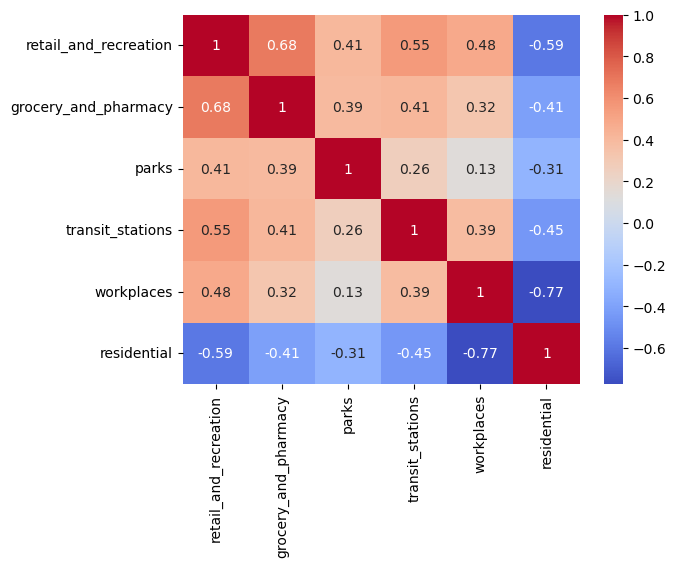

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

## Retail and Recreation Mobility Trends by Date

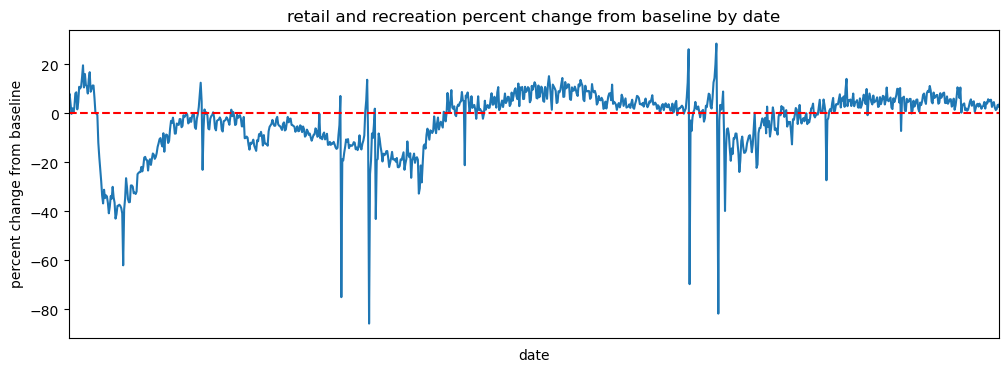

In [10]:
mobility_trends_by_date(data=US_Mobility, category='retail_and_recreation', plot_title='retail and recreation')

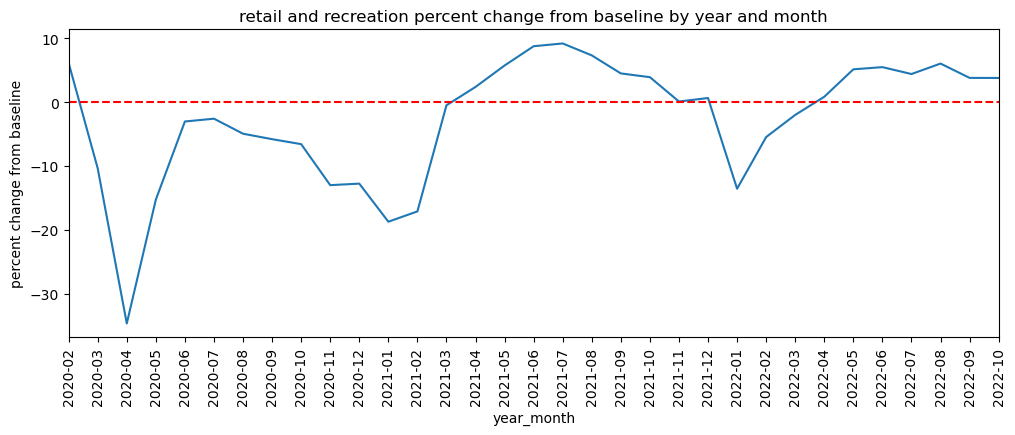

In [11]:
mobility_trends_by_year_month(data=US_Mobility, category='retail_and_recreation', plot_title='retail and recreation')

## Parks Mobility Trends by Date

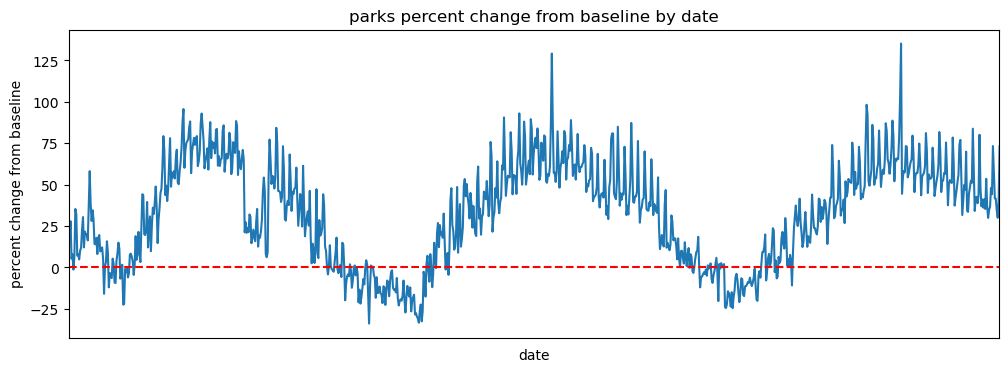

In [12]:
mobility_trends_by_date(data=US_Mobility, category='parks', plot_title='parks')

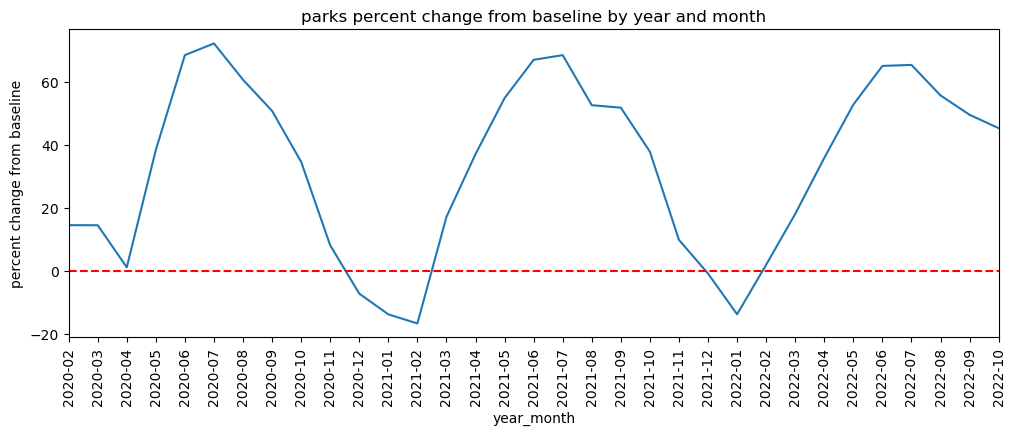

In [13]:
mobility_trends_by_year_month(data=US_Mobility, category='parks', plot_title='parks')

## Transit Stations Mobility Trends by Date

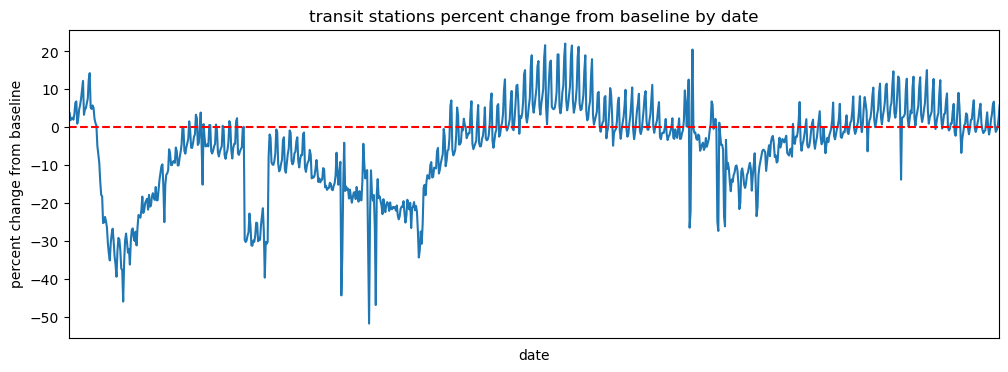

In [14]:
mobility_trends_by_date(data=US_Mobility, category='transit_stations', plot_title='transit stations')

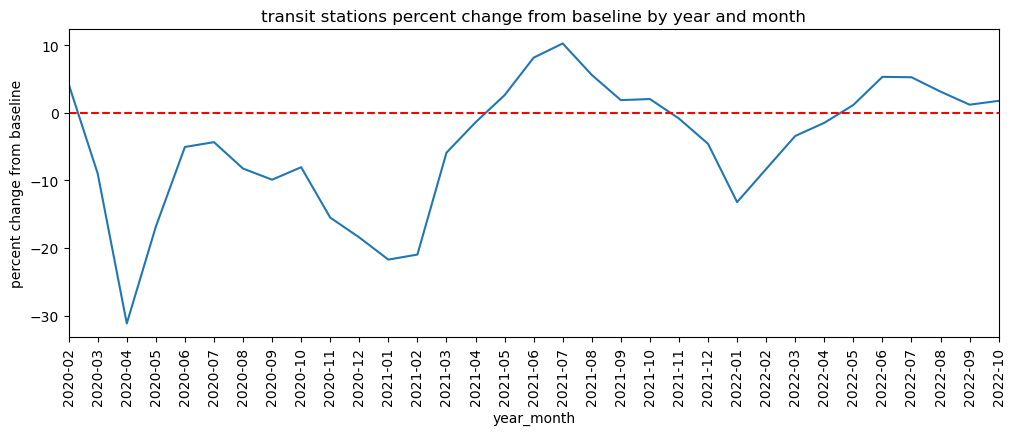

In [15]:
mobility_trends_by_year_month(data=US_Mobility, category='transit_stations', plot_title='transit stations')

## Grocery and Pharmacy Mobility Trends by Date

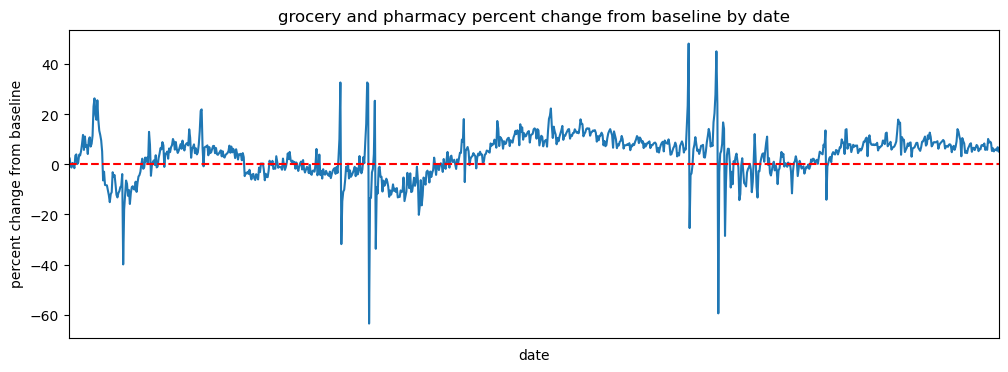

In [16]:
mobility_trends_by_date(data=US_Mobility, category='grocery_and_pharmacy', plot_title='grocery and pharmacy')

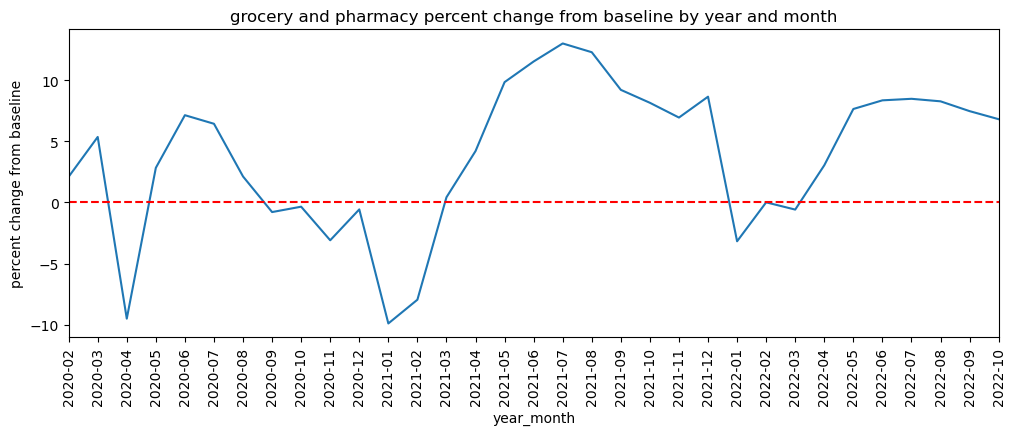

In [17]:
mobility_trends_by_year_month(data=US_Mobility, category='grocery_and_pharmacy', plot_title='grocery and pharmacy')

## Residential Mobility Trends by Date

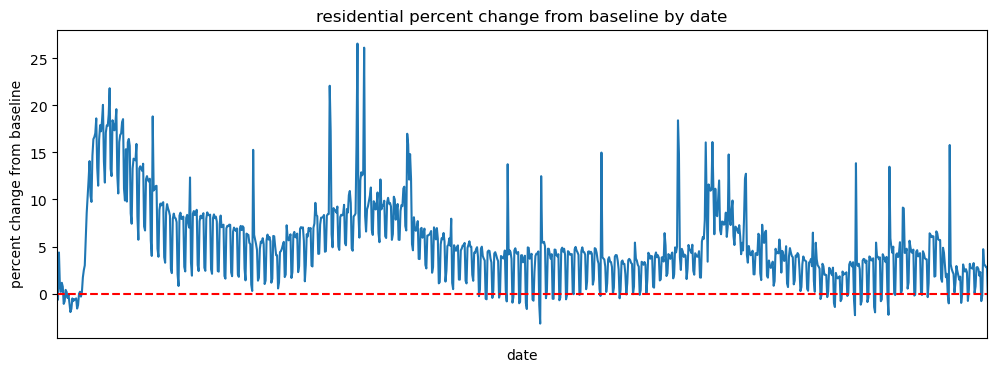

In [18]:
mobility_trends_by_date(data=US_Mobility, category='residential', plot_title='residential')

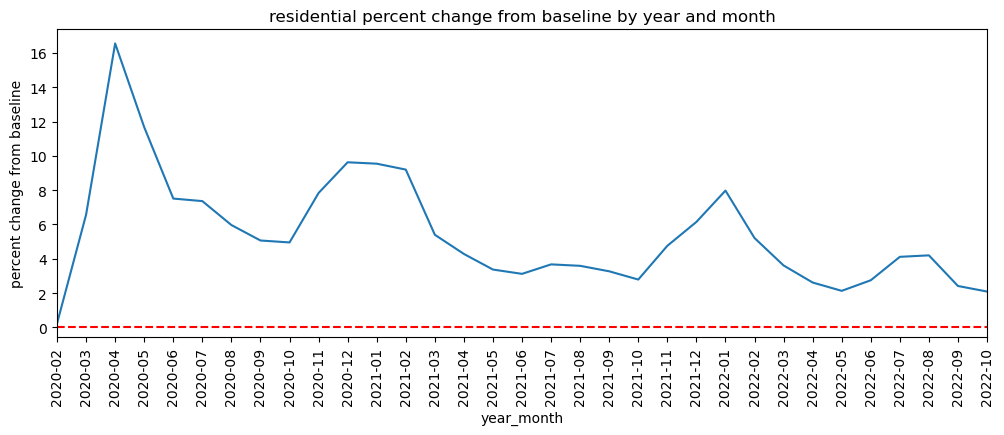

In [19]:
mobility_trends_by_year_month(data=US_Mobility, category='residential', plot_title='residential')

## Workplaces Mobility Trends by Date

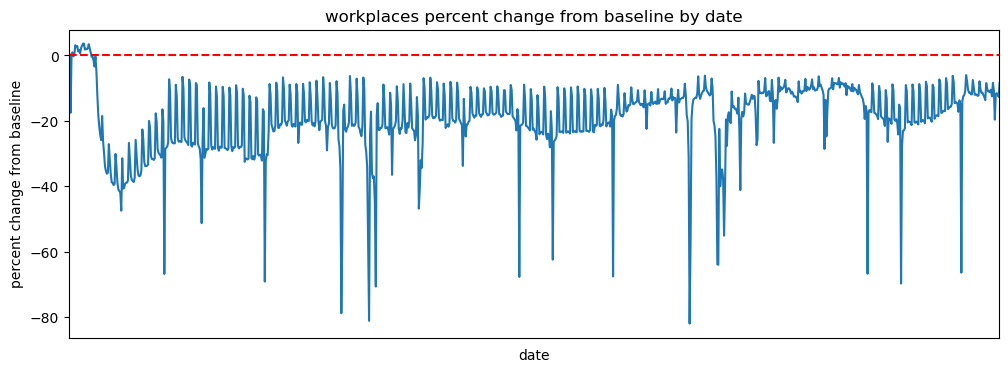

In [20]:
mobility_trends_by_date(data=US_Mobility, category='workplaces', plot_title='workplaces')

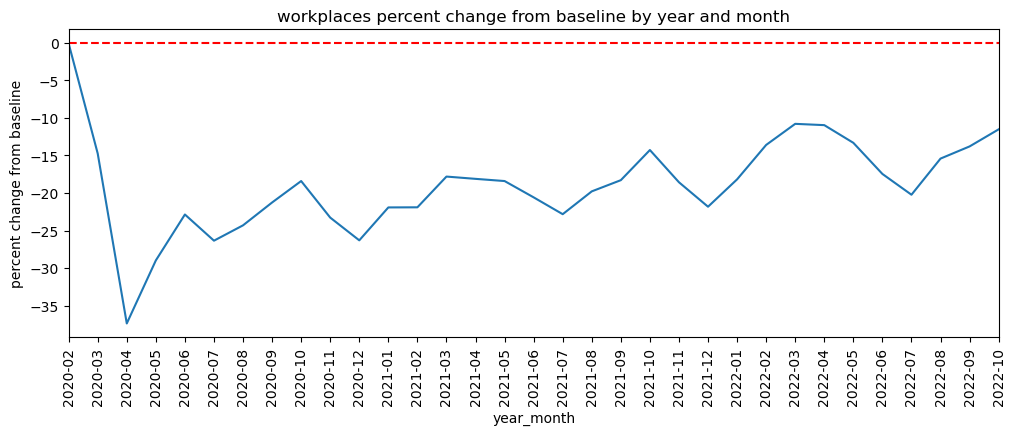

In [21]:
mobility_trends_by_year_month(data=US_Mobility, category='workplaces', plot_title='workplaces')

Our analysis revealed significant decreases in mobility across all categories during the pandemic, with the most substantial reductions observed in retail and recreation, transit stations, and workplaces. The residential category experienced increased mobility, reflecting the shift to remote work and stay-at-home orders.

In the following part, we provide the in depth analysis of the mobility trends by mobility categories.

## Transit Stations {Han} `TODO`
Sharp decline in mobility as people reduced non-essential travel and public transportation use
Gradual recovery in some areas, but remained lower than pre-pandemic levels overall

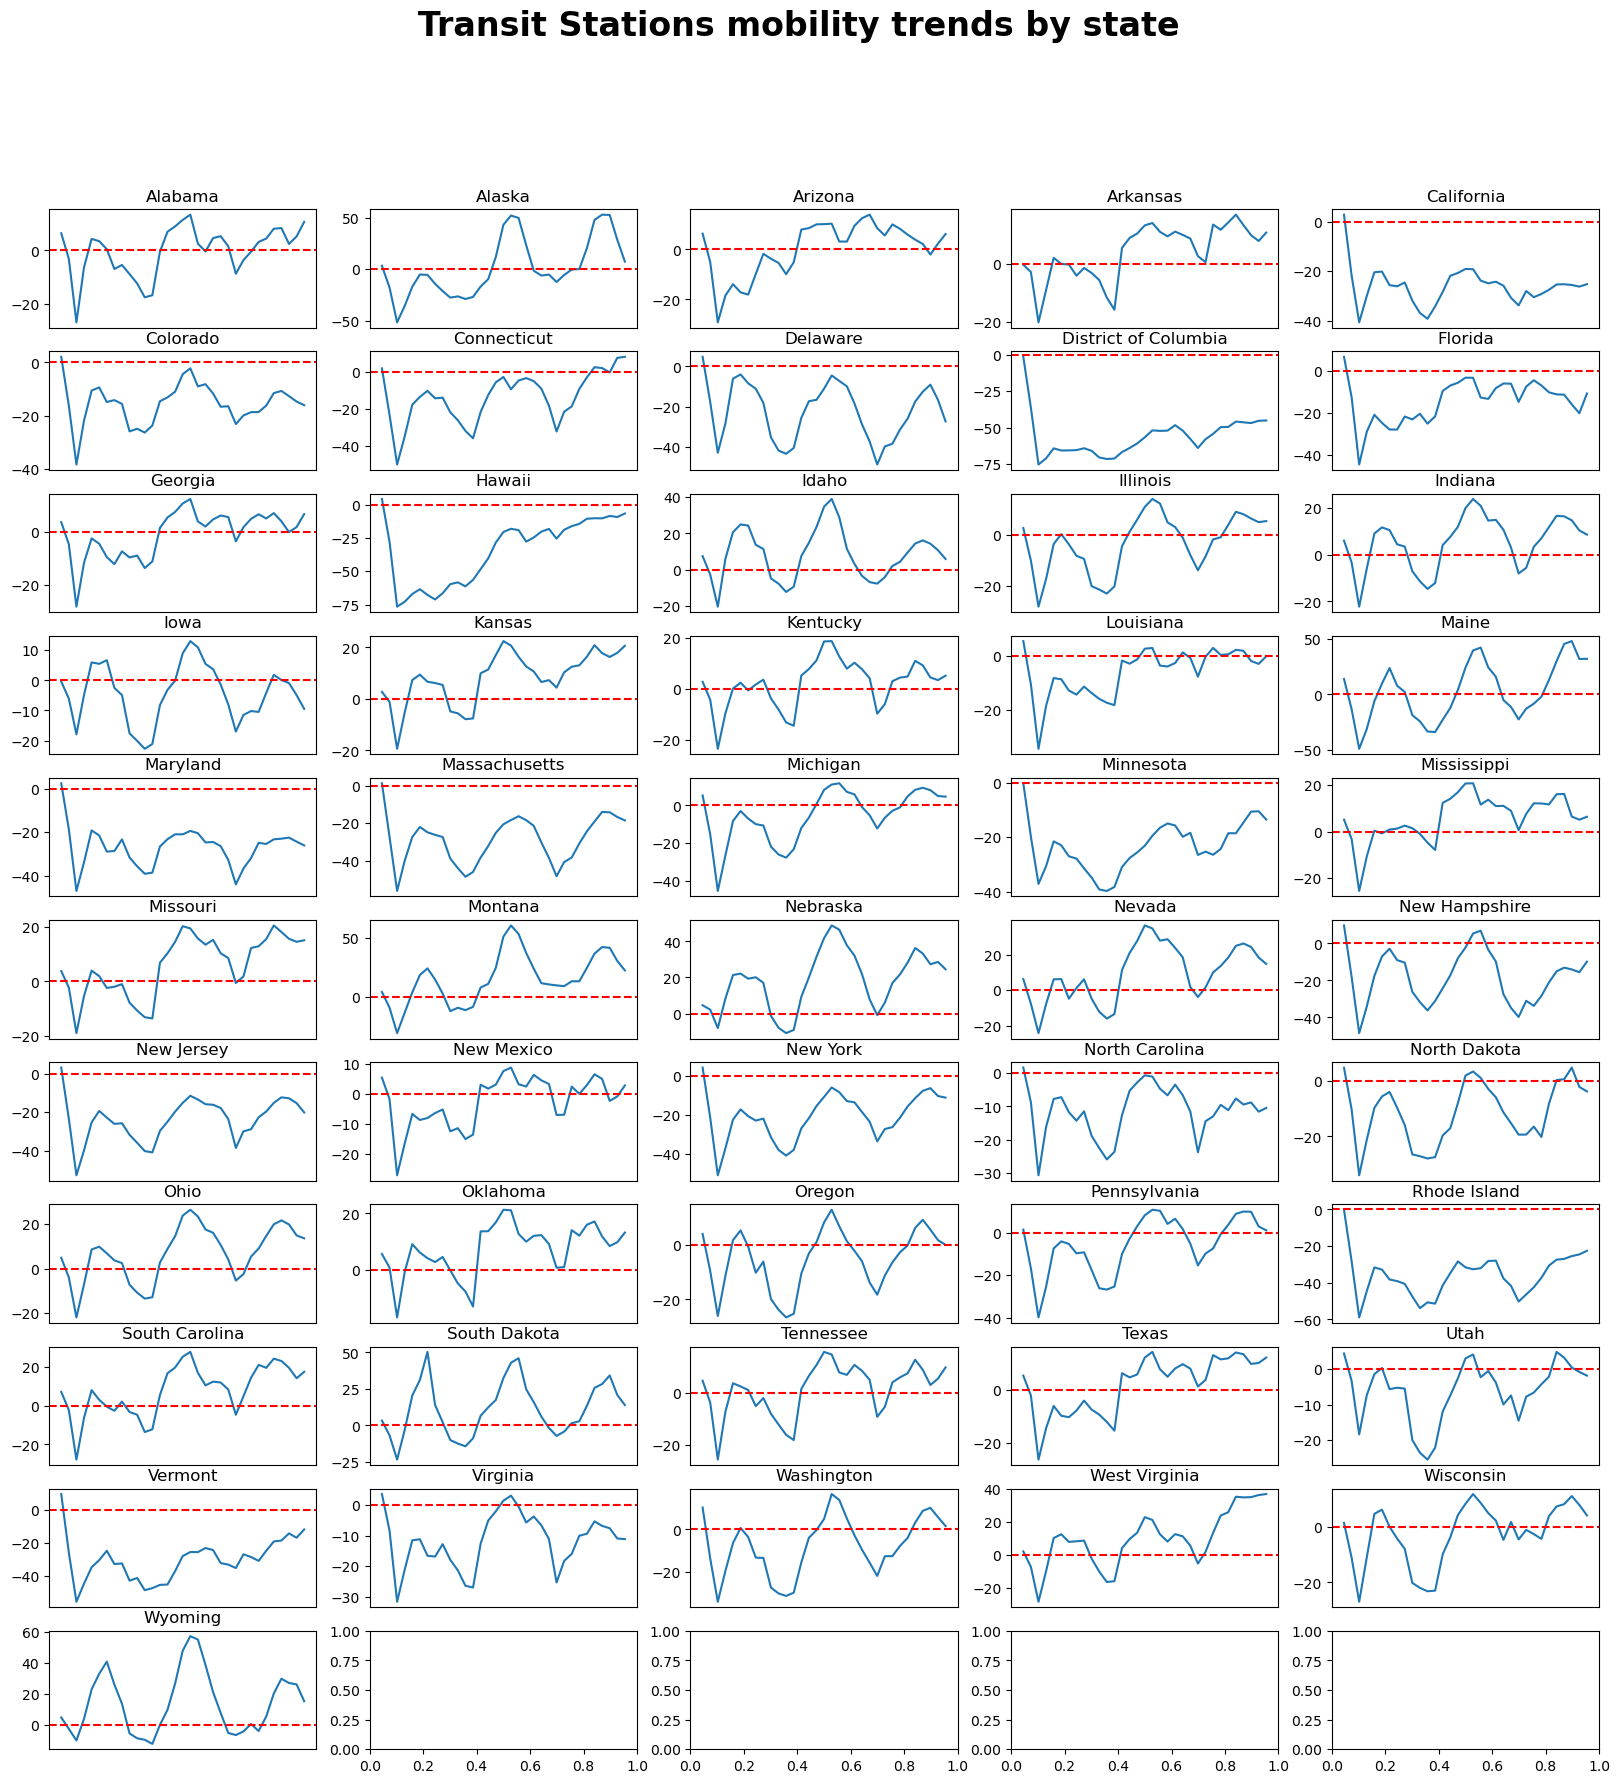

In [22]:
mobility_trends_by_category(data=US_Mobility, category='transit_stations', plot_title='Transit Stations')

## Parks {Han} `TODO`

Fluctuations in mobility, with increases observed during lockdowns as people sought outdoor recreation while adhering to social distancing guidelines
Weather and regional factors played a role in determining park mobility patterns

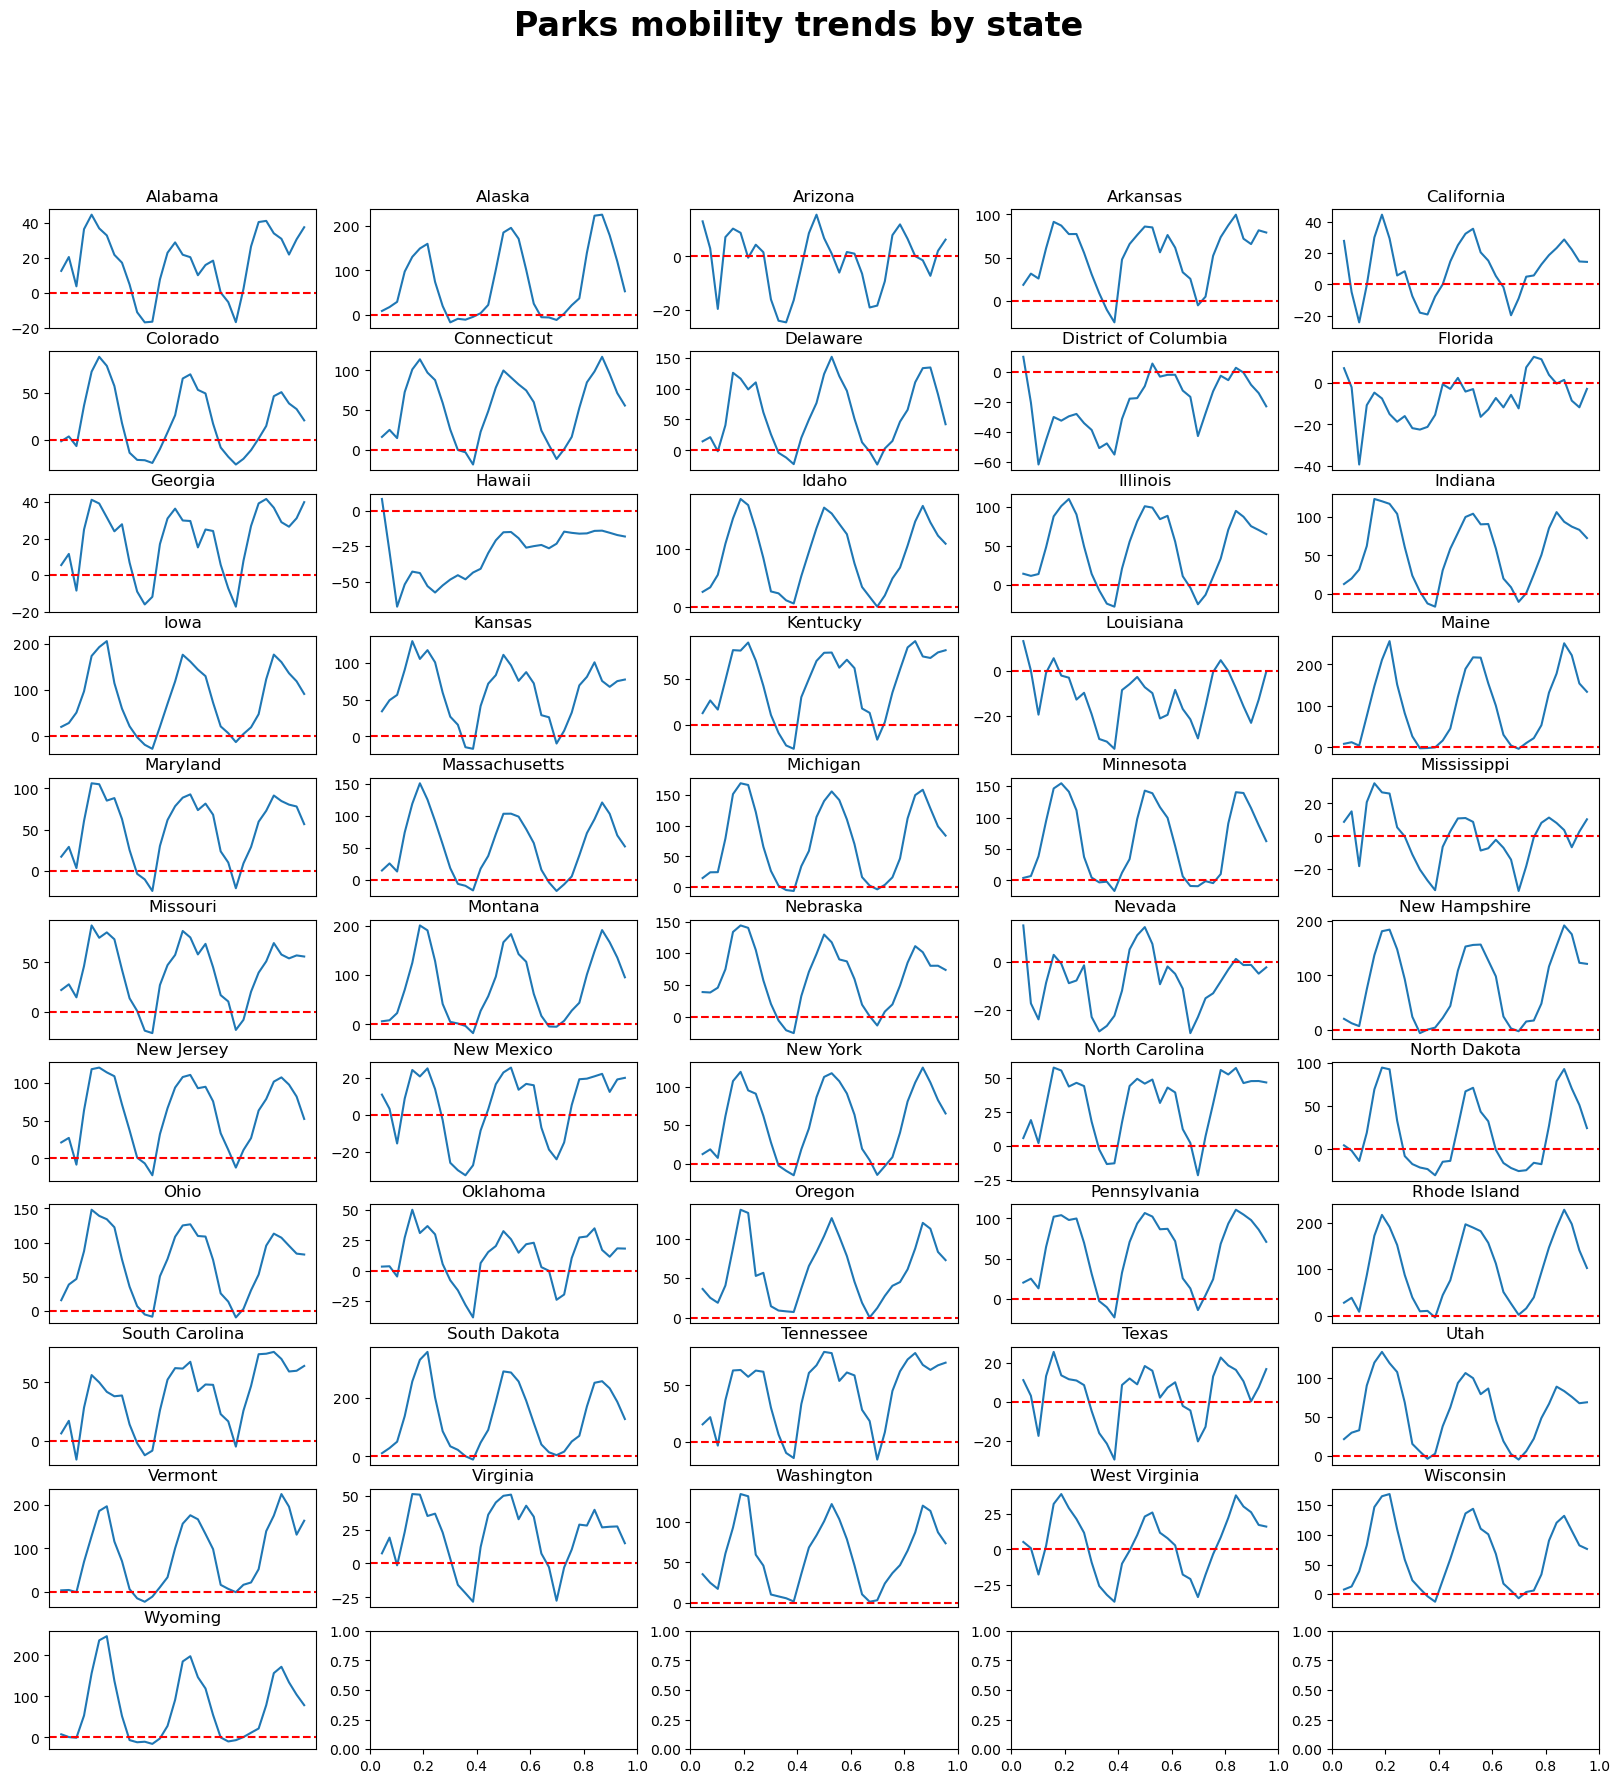

In [23]:
mobility_trends_by_category(data=US_Mobility, category='parks', plot_title='Parks')

## Grocery and Pharmacy {} `TODO`

Initial surge in mobility during panic-buying phase, followed by stabilization at lower levels compared to pre-pandemic
Shift to online shopping and home delivery contributed to reduced mobility

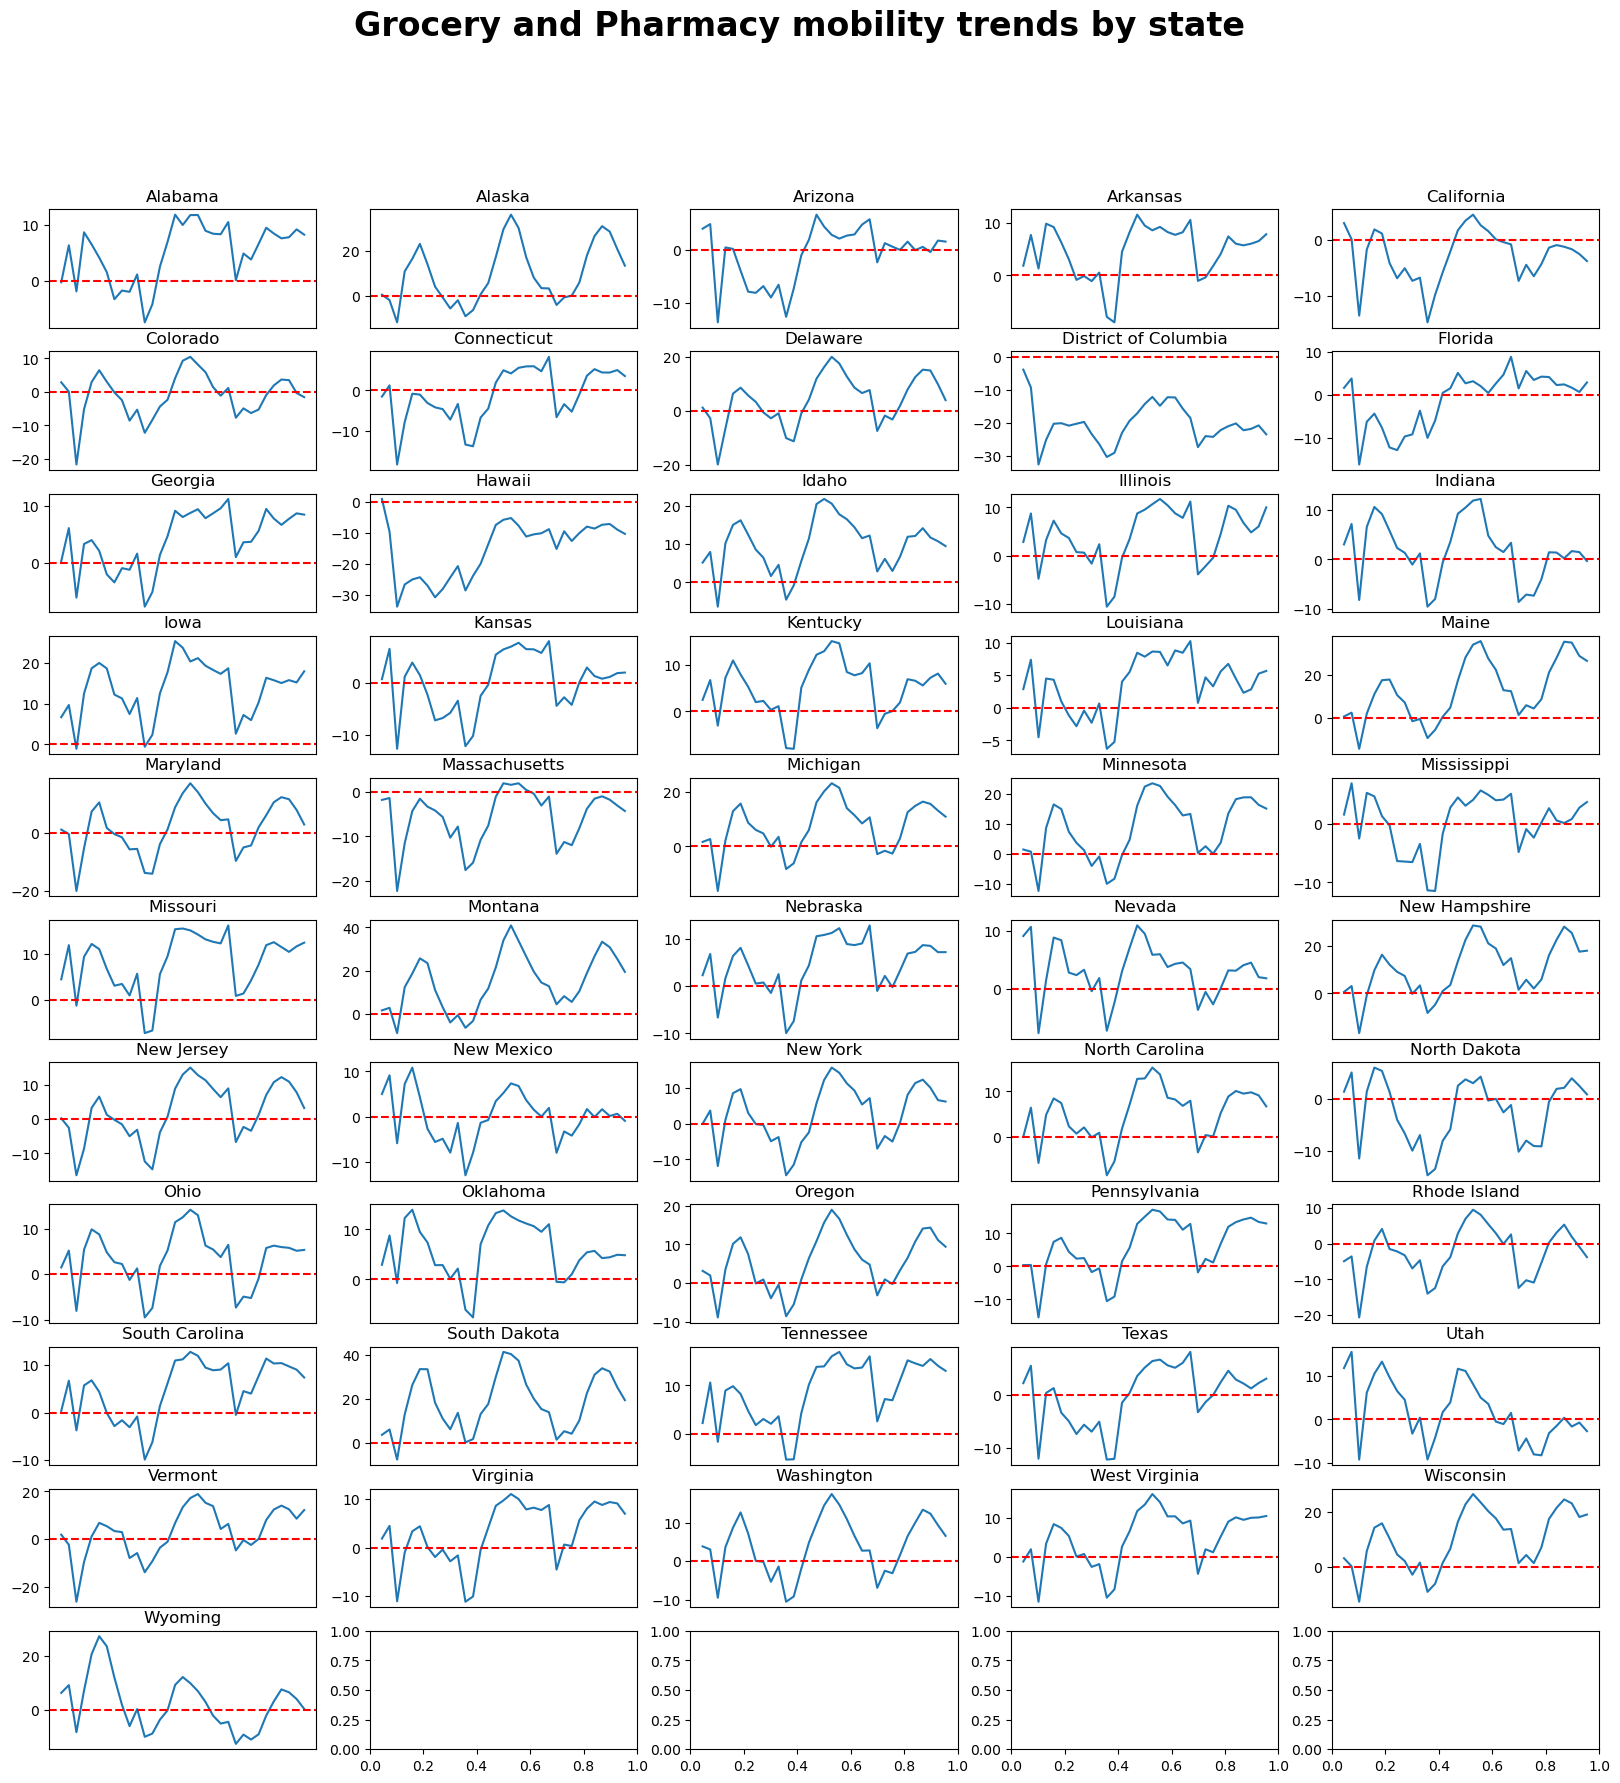

In [24]:
mobility_trends_by_category(data=US_Mobility, category='grocery_and_pharmacy', plot_title='Grocery and Pharmacy')

## Retail and Recreation {haoyu} `TODO`

Substantial decline in mobility during lockdowns and resurgence of activity during reopening phases
Variation in the extent of decline across different regions

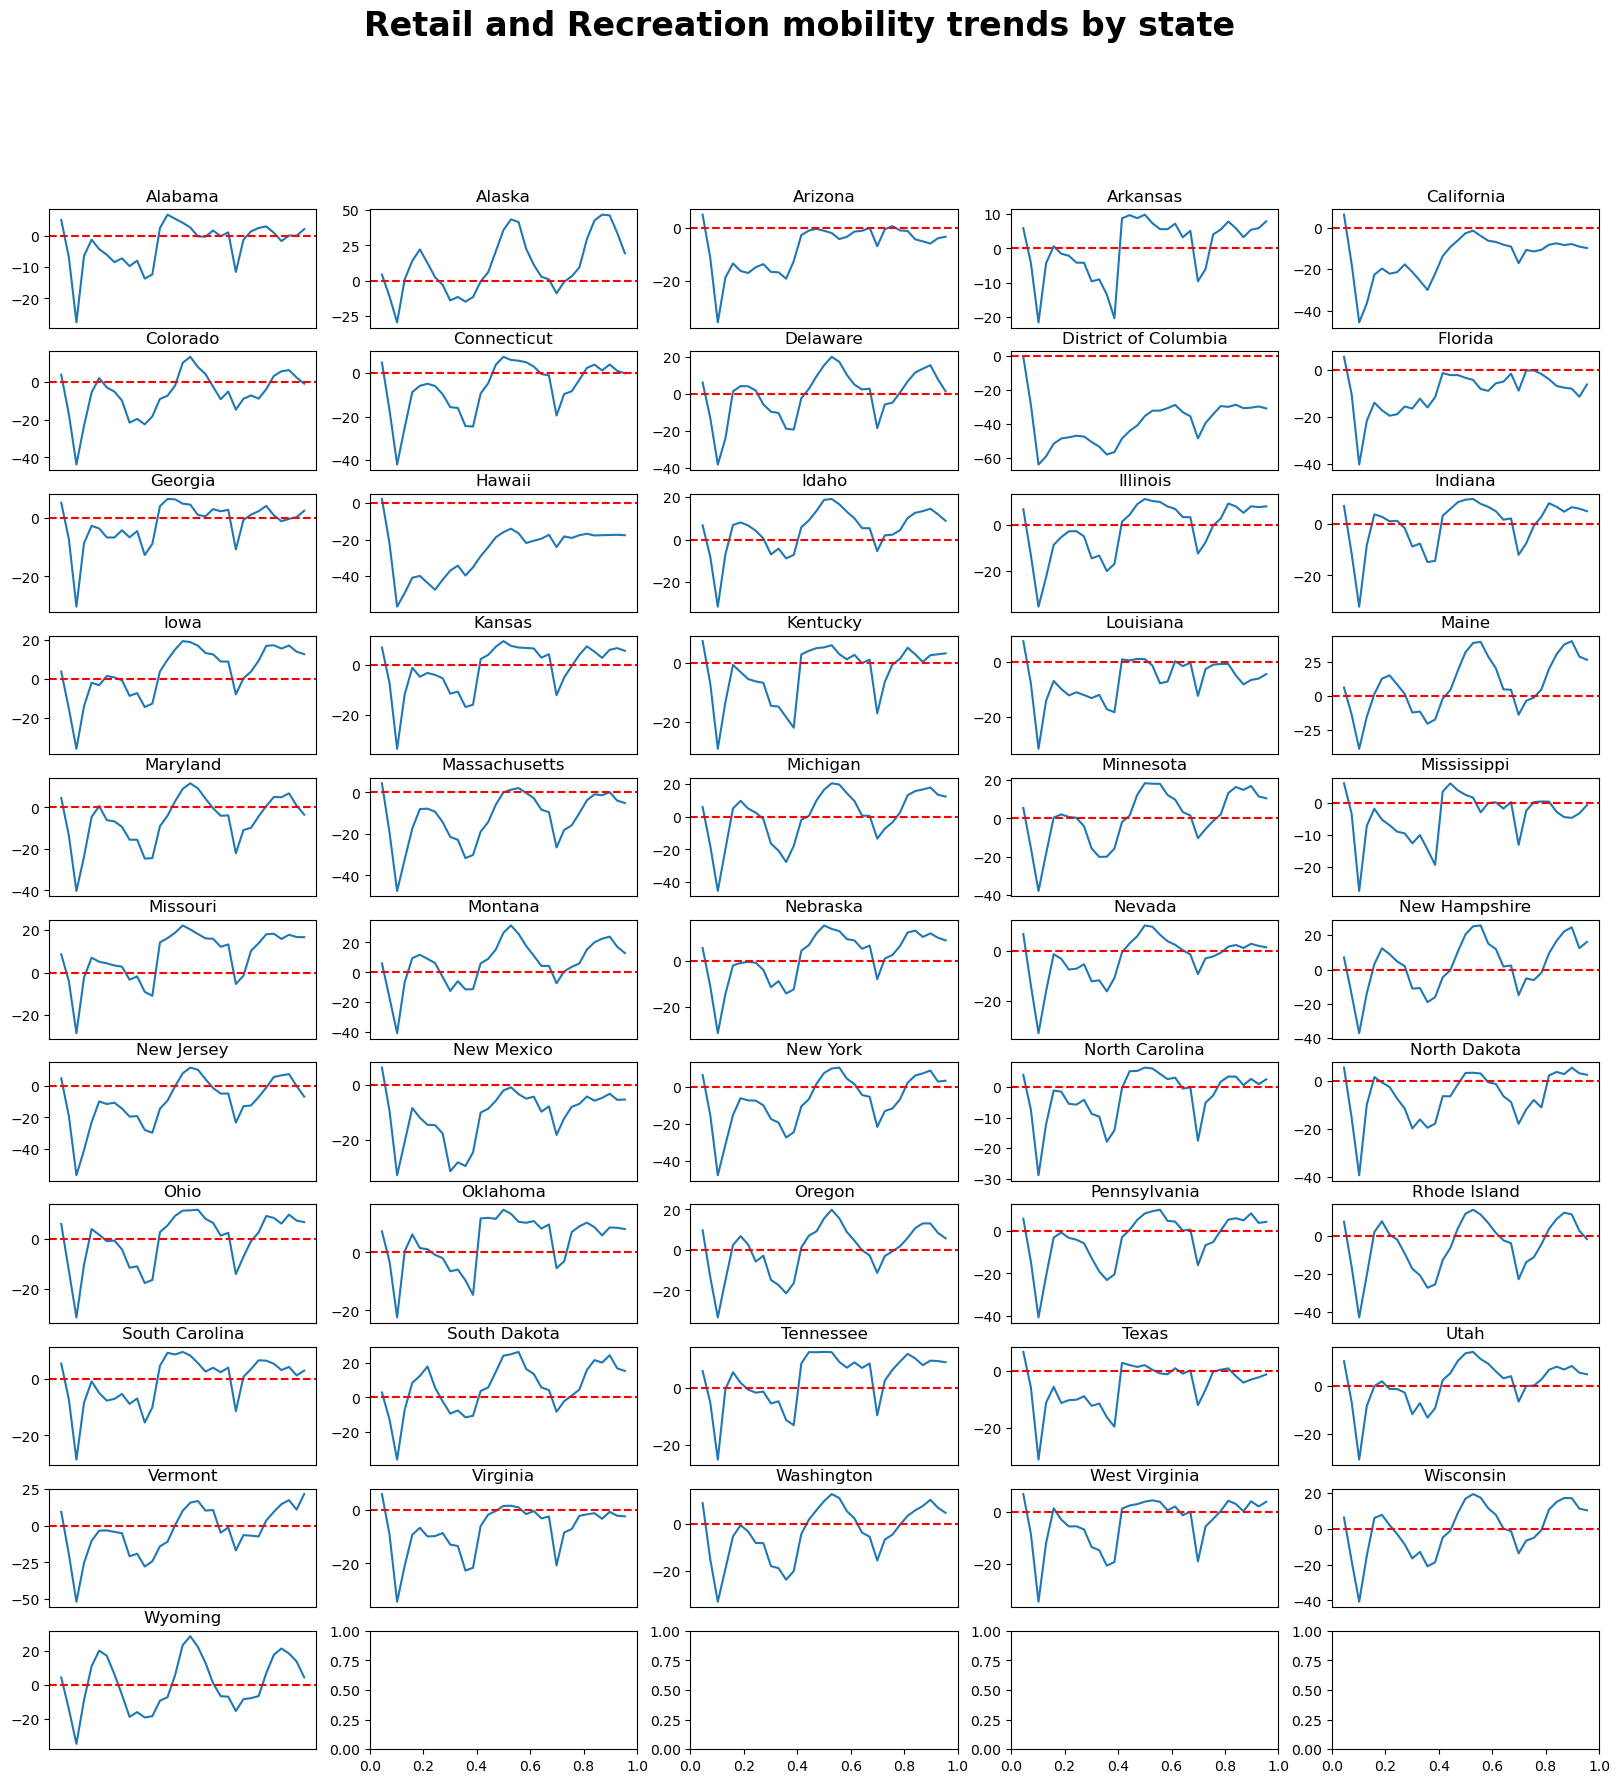

In [25]:
mobility_trends_by_category(data=US_Mobility, category='retail_and_recreation', plot_title='Retail and Recreation')

In [26]:
covid = pd.read_csv("data/covid.csv")
covid = covid[covid["Location"] != "United States"]
covid["infection_rate"] = covid["Oct_2020_Cases"] / covid["Total Population"]
c = covid.groupby("Large Gatherings Ban")["infection_rate"].min()
c

Large Gatherings Ban
>10 Prohibited               0.001805
>25 Prohibited               0.003803
>50 Prohibited               0.000920
All Gatherings Prohibited    0.000679
No Limit                     0.002035
Name: infection_rate, dtype: float64

Text(0, 0.5, 'percent change from baseline')

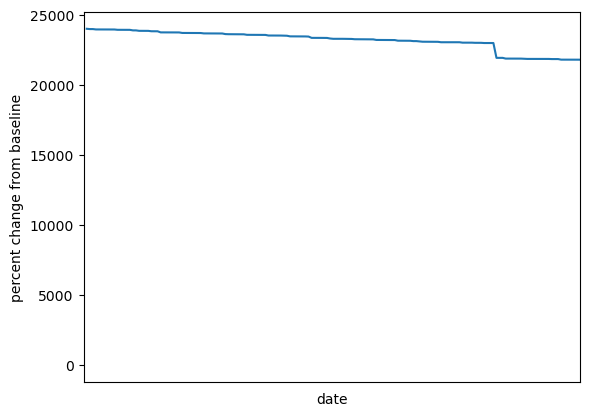

In [27]:
cases = pd.read_csv("data/US-States.csv")
sns.lineplot(data=cases[cases["state"] == "Missouri"], x='date', y="deaths", estimator='mean' , errorbar=None)
#plt.axhline(y=0, linestyle='dashed', color='red')
plt.xticks([])
plt.xlim('2020-02-15', '2022-10-14')
#plt.title('{title} percent change from baseline by date'.format(title=plot_title))
plt.ylabel('percent change from baseline')

## Residential {June} `TODO`

Increased mobility as people spent more time at home due to remote work and stay-at-home orders
Varied by region, reflecting differences in policy responses and local conditions

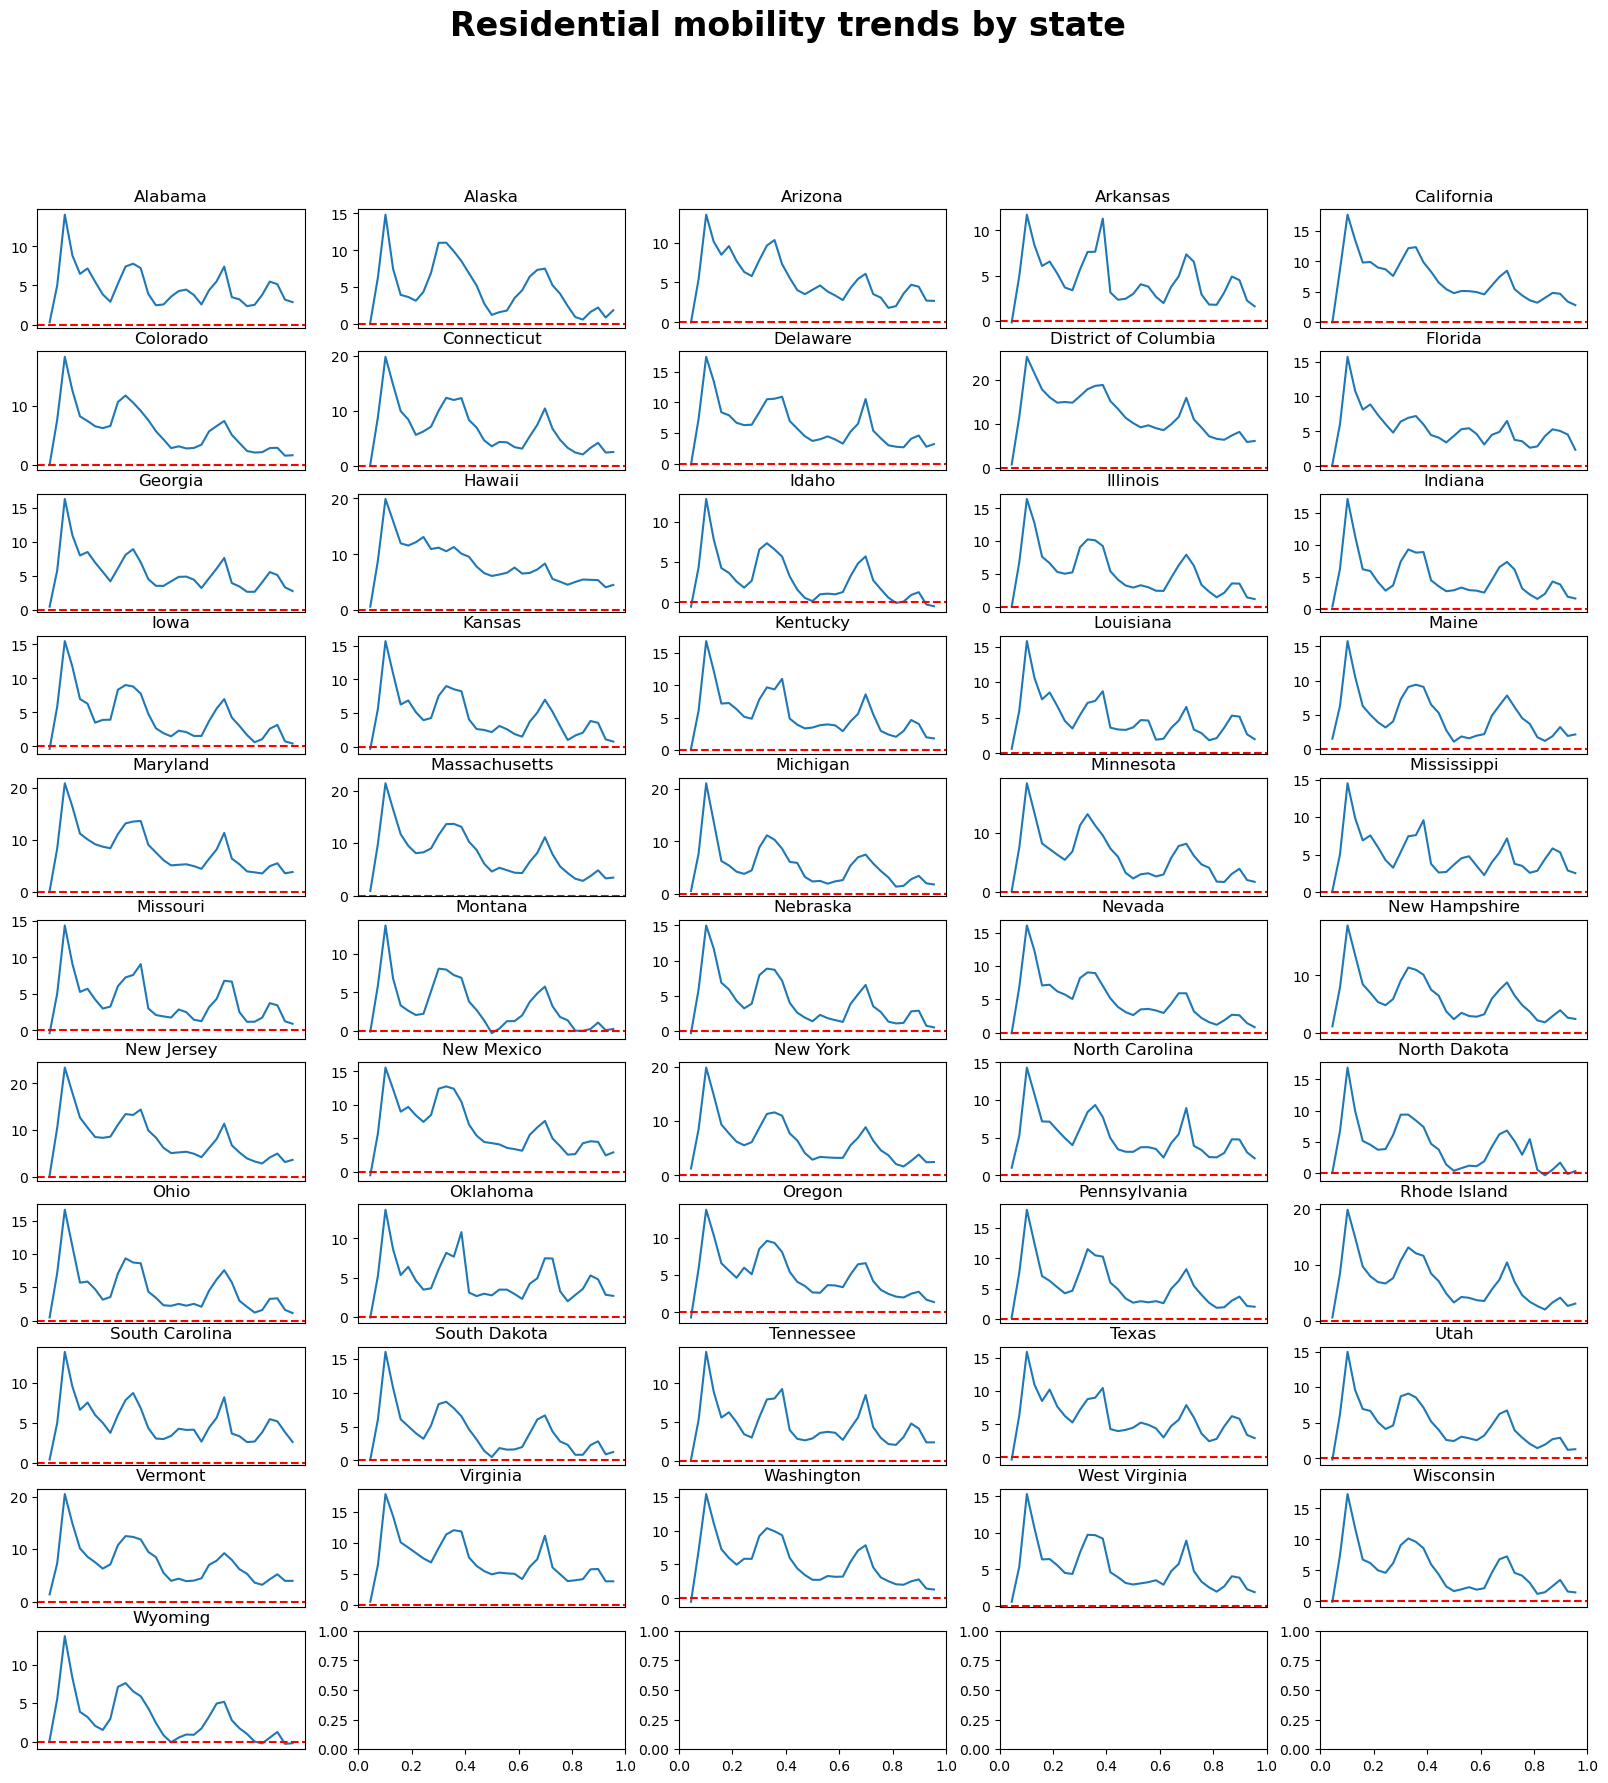

In [28]:
mobility_trends_by_category(data=US_Mobility, category='residential', plot_title='Residential')

In [29]:
print(US_2020['date'].min())
print(US_2022['date'].max())

2020-02-15
2022-10-15


In [30]:
cases = cases[(cases['date'] >= '2020-02-15') & (cases['date'] <= '2022-10-15')]
cases['year_month'] = cases['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
cases['year_month']

115      2020-02
116      2020-02
117      2020-02
118      2020-02
119      2020-02
          ...   
53033    2022-10
53034    2022-10
53035    2022-10
53036    2022-10
53037    2022-10
Name: year_month, Length: 52923, dtype: object

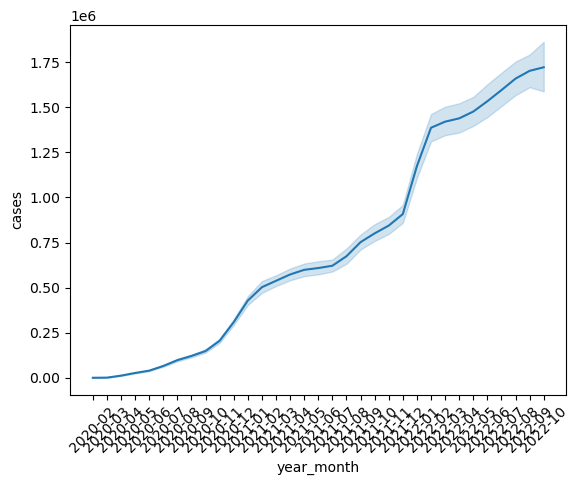

In [34]:
sns.lineplot(data = cases, x = 'year_month', y = 'cases')
plt.xticks(rotation = 45);

In [35]:
valid_case = cases[cases['state'].isin(US_Mobility['state'].unique())]

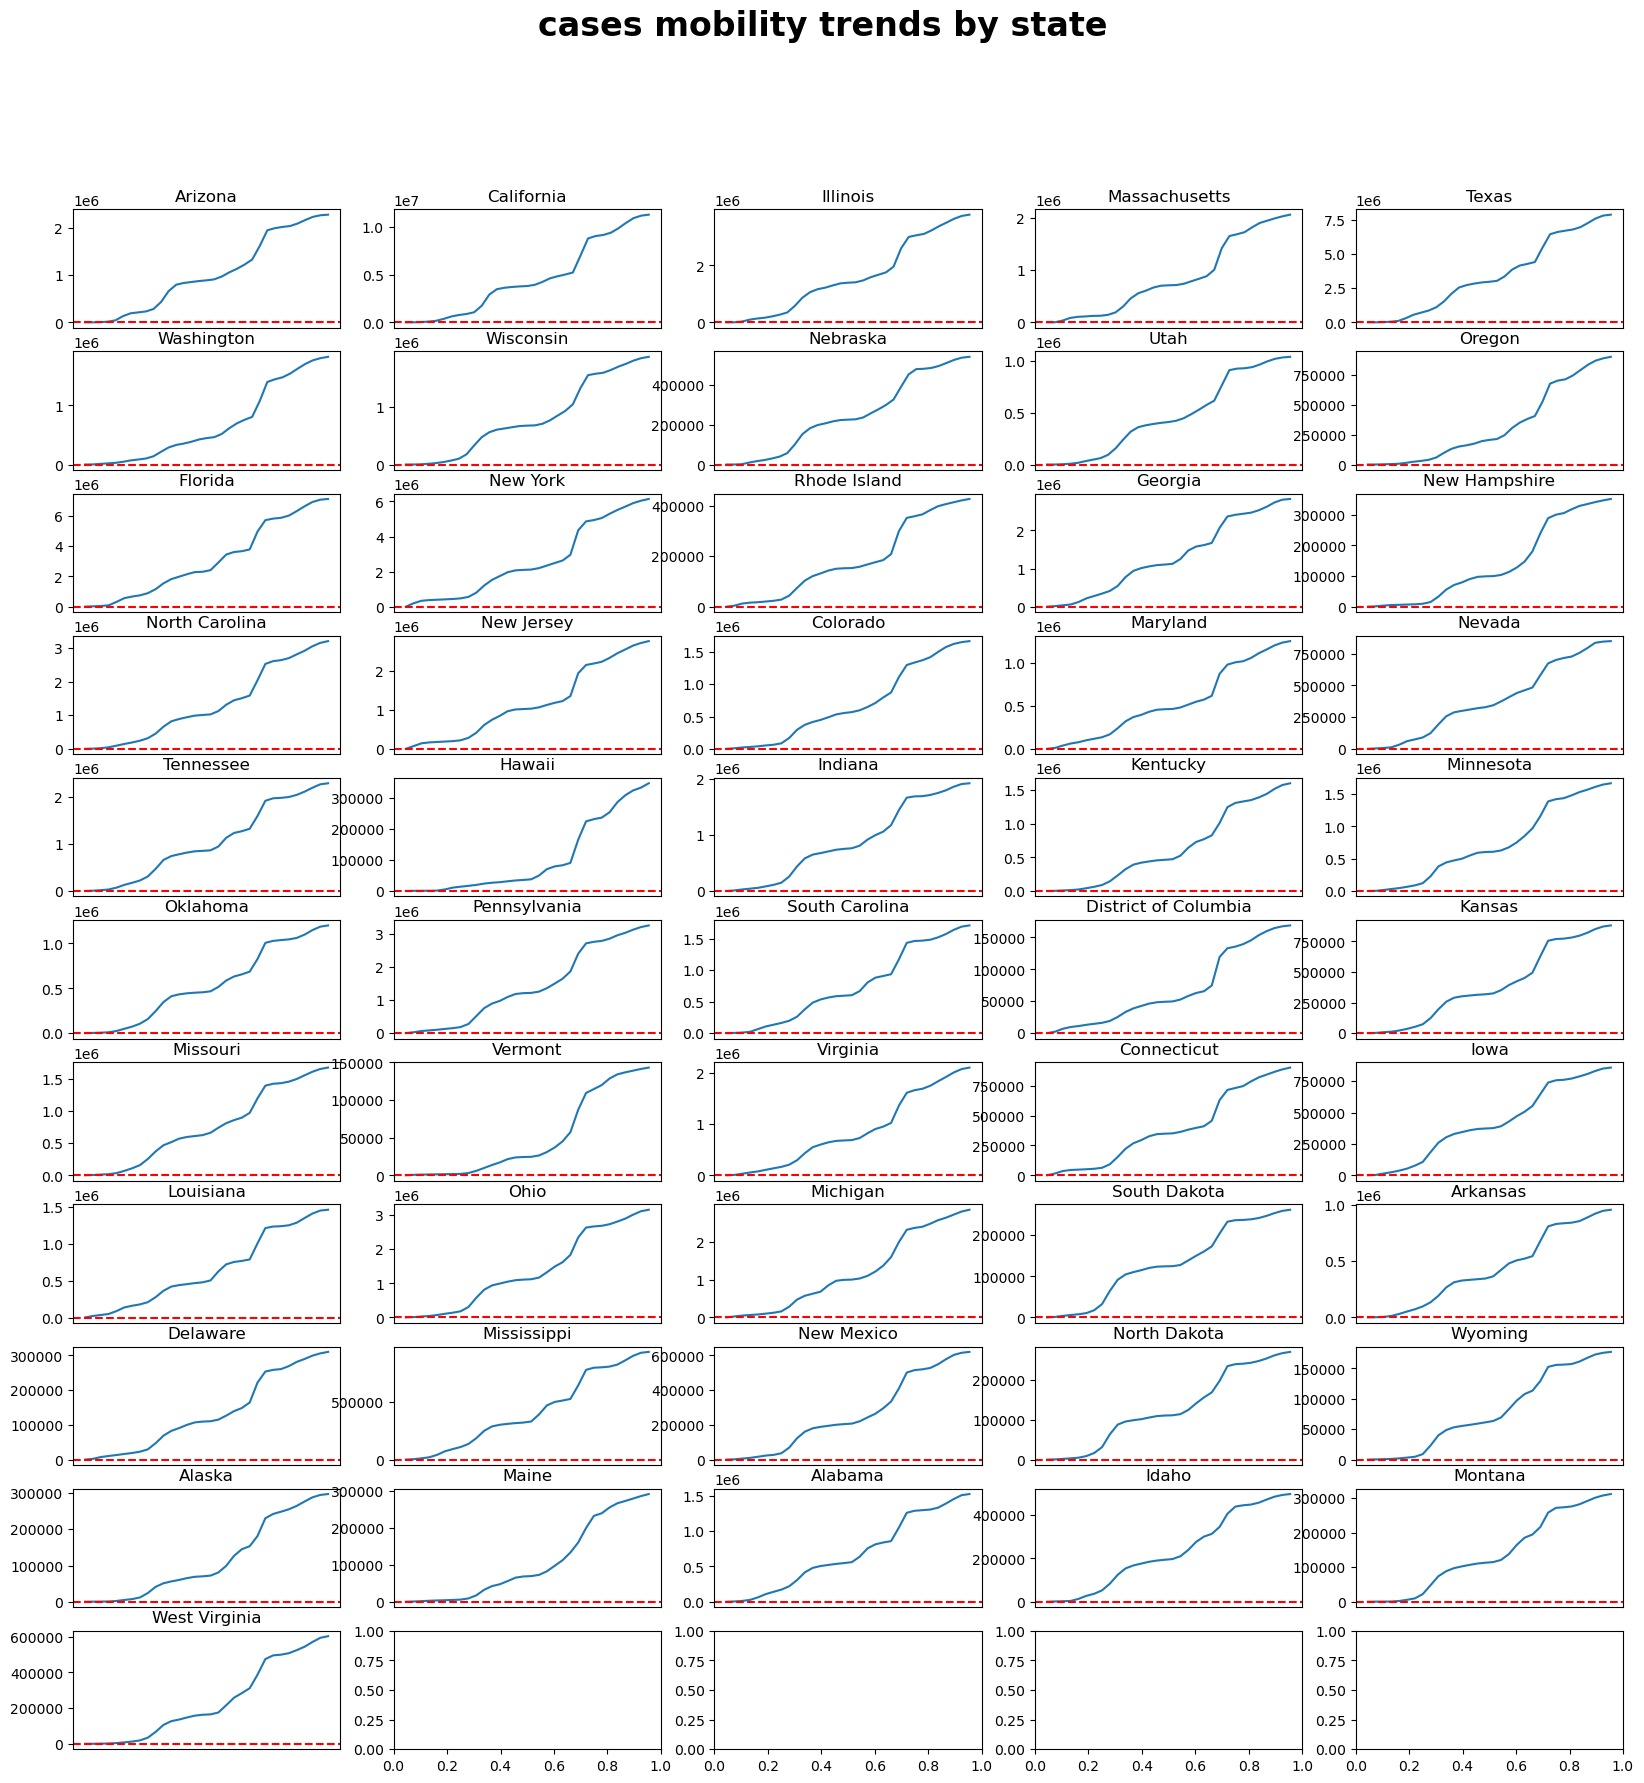

In [36]:
mobility_trends_by_category(data = valid_case, category = 'cases', plot_title = 'cases')

In [37]:
US_Mobility.head()

state county        date  retail_and_recreation  grocery_and_pharmacy  \
0   NaN    NaN  2020-02-15                    6.0                   2.0   
1   NaN    NaN  2020-02-16                    7.0                   1.0   
2   NaN    NaN  2020-02-17                    6.0                   0.0   
3   NaN    NaN  2020-02-18                    0.0                  -1.0   
4   NaN    NaN  2020-02-19                    2.0                   0.0   

   parks  transit_stations  workplaces  residential year_month  
0   15.0               3.0         2.0         -1.0    2020-02  
1   16.0               2.0         0.0         -1.0    2020-02  
2   28.0              -9.0       -24.0          5.0    2020-02  
3    6.0               1.0         0.0          1.0    2020-02  
4    8.0               1.0         1.0          0.0    2020-02

In [38]:
US_Mobility_noNAs = US_Mobility.dropna()
corr_res_work = np.corrcoef(US_Mobility_noNAs['residential'], US_Mobility_noNAs['workplaces'])
corr_res_work

array([[ 1.        , -0.82579813],
       [-0.82579813,  1.        ]])

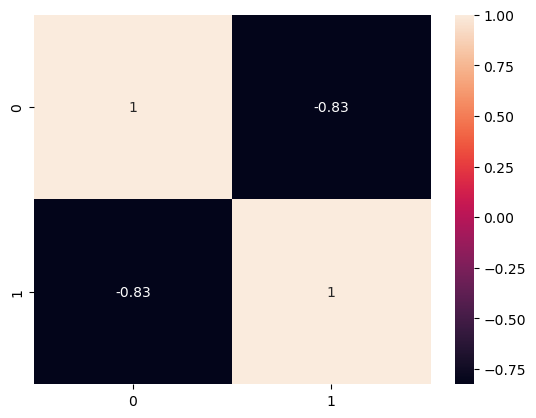

In [39]:
sns.heatmap(corr_res_work, annot = True);

## Workplaces {June} `TODO`

Decreased mobility due to remote work policies and business closures
Uneven recovery, with some sectors returning to in-person work faster than others

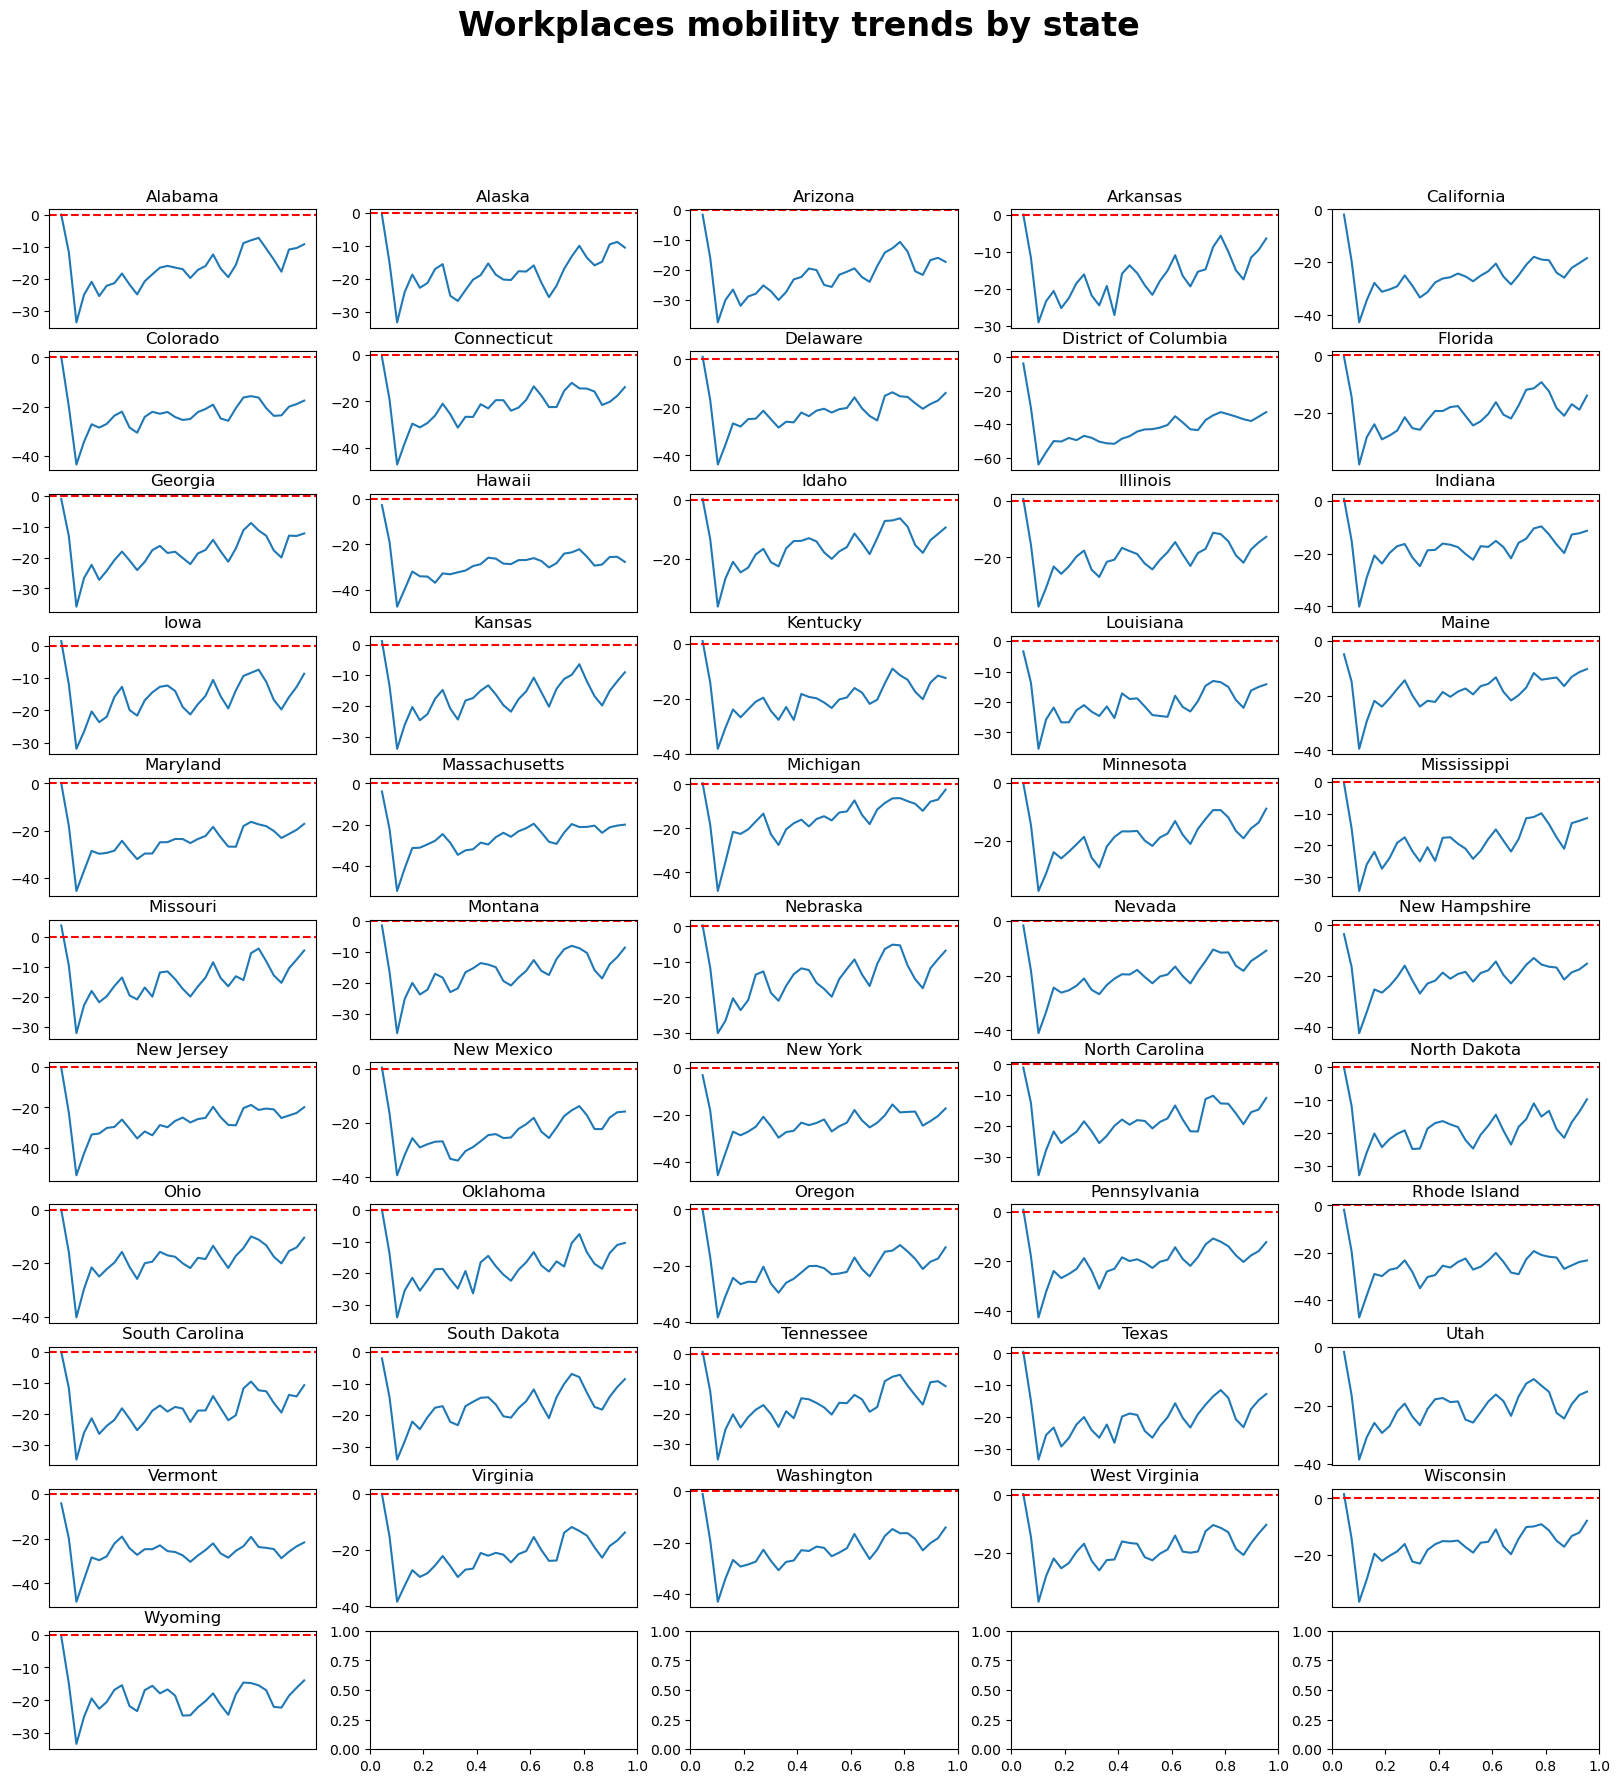

In [40]:
mobility_trends_by_category(data=US_Mobility, category='workplaces', plot_title='Workplaces')

## Conclusion {Han}

This study contributes to the understanding of the effect of COVID-19 on U.S. mobility patterns by providing a comprehensive analysis of Google Community Mobility Reports data across various mobility categories. The findings demonstrate the pandemic's significant and varied impact on different aspects of mobility, with implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

Our analysis revealed that the retail and recreation, transit stations, and workplaces categories experienced the most substantial reductions in mobility during the pandemic. These sectors were highly vulnerable to the effects of social distancing measures and lockdowns. In contrast, the residential category saw increased mobility as people adapted to remote work and stay-at-home orders.

The time-series analysis demonstrated a strong association between mobility changes and key pandemic events, such as lockdowns and reopening phases. However, mobility patterns exhibited a high degree of variation across states and over time, reflecting differing policy responses and regional characteristics. This highlights the importance of considering regional variations when designing policies and interventions to address the pandemic's impact on mobility.

`TODO: Conclusion by mobility categories`

As the COVID-19 pandemic continues to evolve, it is crucial to monitor mobility trends and adapt policies accordingly. Future research could explore the long-term implications of the pandemic on mobility, such as potential shifts in work-from-home policies, urban planning, and transportation infrastructure. Additionally, examining the role of vaccination campaigns in shaping mobility trends can provide valuable insights for policymakers as they navigate the ongoing pandemic and its aftermath.

In conclusion, this study offers a comprehensive analysis of the effect of COVID-19 on U.S. mobility patterns using Google Community Mobility Reports data. The findings underscore the pandemic's significant and multifaceted impact on various aspects of mobility, emphasizing the importance of tailored policy interventions and continued research to better understand and address the long-term consequences of the pandemic on human mobility.

### Residential & Workplaces

We assumed that there will be relation between residential and workplaces categories since if people work at home, the residential mobility will increase and the workplaces mobility will decrease. Calculating the correlation coefficient between residential category and workplaces category, the value was -0.83 which is quite high. This means that as the residential mobility increases, the workplaces mobility decreases or as the residential mobility decreases, the workplaces mobility increases with quite high rate. This makes sense with our assumption of the relation between residential and workplaces mobility trend.